# Projeto final

Bem vindo ao projeto final do curso/módulo de Pandas.
Neste projeto, você deve responder a um conjunto de perguntas feitas a dois conjuntos de dados:

1. [Obesity among adults by country, 1975-2016](https://www.kaggle.com/amanarora/obesity-among-adults-by-country-19752016/)
2. [GDP Per Person (1901-2011)](https://www.kaggle.com/divyansh22/gdp-per-person-19012011?select=GDP.csv)

Tais conjuntos de dados são públicos foram publicados no Kaggle. Mais instruções sobre cada um deles podem ser encontrados nos links acima. Você também os encontrará na pasta `Datasets`, dentro de nossas apostilas.

In [3]:
import pandas as pd
import numpy as np

## Perguntas - Obesity among adults by country, 1975-2016

In [3]:
df = pd.read_csv("obesity_cleaned.csv")
df

,Unnamed: 0,Country,Year,Obesity (%),Sex
0,0,Afghanistan,1975,0.5 [0.2-1.1],Both sexes
1,1,Afghanistan,1975,0.2 [0.0-0.6],Male
2,2,Afghanistan,1975,0.8 [0.2-2.0],Female
3,3,Afghanistan,1976,0.5 [0.2-1.1],Both sexes
4,4,Afghanistan,1976,0.2 [0.0-0.7],Male
...,...,...,...,...,...
24565,24565,Zimbabwe,2015,4.5 [2.4-7.6],Male
24566,24566,Zimbabwe,2015,24.8 [18.9-31.3],Female
24567,24567,Zimbabwe,2016,15.5 [12.0-19.2],Both sexes
24568,24568,Zimbabwe,2016,4.7 [2.5-8.0],Male


- Limpe os dados do DataFrame, criando uma coluna de nome 'Obesity' que conterá os valores de obesidade. Transforme em float as colunas que porventura foram importadas como string.

In [4]:
df['Obesity'] = df['Obesity (%)'].apply(lambda x: x.split()[0])

In [5]:
df.loc[df['Obesity'] == 'No', 'Obesity'] = np.nan

In [6]:
df['Obesity'] = df['Obesity'].dropna()

In [7]:
df['Obesity'] = df['Obesity'].apply(lambda x: float(x))
df['Year'] = df['Year'].apply(lambda x: int(x))

In [8]:
df['Obesity']

0         0.5
1         0.2
2         0.8
3         0.5
4         0.2
         ... 
24565     4.5
24566    24.8
24567    15.5
24568     4.7
24569    25.3
Name: Obesity, Length: 24570, dtype: float64

In [12]:
df.set_index('Year', inplace=True)

- Qual o percentual médio de obesidade por sexo no mundo no ano de 2015?

In [14]:
df

,Unnamed: 0,Country,Obesity (%),Sex,Obesity
Year,,,,,
1975,0,Afghanistan,0.5 [0.2-1.1],Both sexes,0.5
1975,1,Afghanistan,0.2 [0.0-0.6],Male,0.2
1975,2,Afghanistan,0.8 [0.2-2.0],Female,0.8
1976,3,Afghanistan,0.5 [0.2-1.1],Both sexes,0.5
1976,4,Afghanistan,0.2 [0.0-0.7],Male,0.2
...,...,...,...,...,...
2015,24565,Zimbabwe,4.5 [2.4-7.6],Male,4.5
2015,24566,Zimbabwe,24.8 [18.9-31.3],Female,24.8
2016,24567,Zimbabwe,15.5 [12.0-19.2],Both sexes,15.5


In [9]:
df[df.index == 2015].groupby("Sex")["Obesity"].mean()

Sex
Female    26.3
Name: Obesity, dtype: float64

- Quais são os 5 países com a maior e a menor taxa de aumento nos índices de obesidade no período observado?

In [10]:
df_start = df[df.index == 1975]
df_end = df[df.index == 2016]


In [11]:
df_start.set_index("Country", inplace=True)
df_end.set_index("Country", inplace=True)

In [21]:
df_ev = df_end[df_end["Sex"] == "Both sexes"]["Obesity"] - df_start[df_start["Sex"] == "Both sexes"]["Obesity"]

In [26]:
df_ev.sort_values().dropna().head(5)
df_ev

Country
Belgium   NaN
Name: Obesity, dtype: float64

- Quais os países com maiores e menores níveis percetuais de obesidade em 2015?

In [29]:
df_2015 = df[df.index == 2015]
df_2015[df_2015["Obesity"] == df_2015["Obesity"].max()]

,Unnamed: 0,Country,Year,Obesity (%),Sex,Obesity
2015,2015,Belarus,2016,26.3 [18.9-34.2],Female,26.3


- Qual a diferença média percentual de obesidade entre sexos ao longo dos anos para o Brasil?

In [35]:
df_brazil = df[df["Country"] == "Brazil"]

<Axes: >

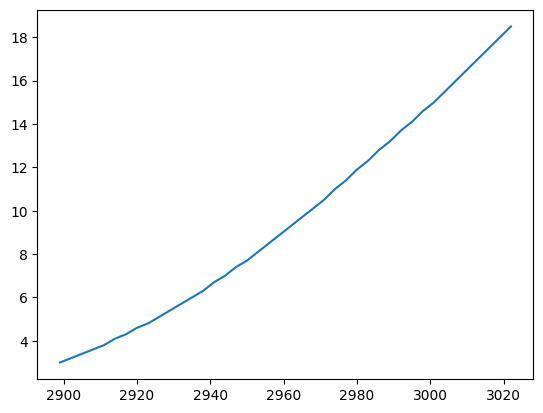

In [43]:
(df_brazil[df_brazil["Sex"] == "Male"]["Obesity"]).plot()


- Você conseguiria plotar um gráfico mostrando a evolução da obesidade para ambos sexos no mundo?

In [ ]:
df_both.plot()

## Perguntas - GDP Per Person (1901-2011)

In [4]:
df_gdp = pd.read_csv("GDP.csv")

- Limpe o conjunto de dados, convertendo strings em datas ou float, quando necessário.

In [5]:
df_gdp

,Country,Region,Year,GDP_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1921,662.40
...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1/1/1991,782.09
4415,Zimbabwe,Sub-Saharan Africa,1/1/1996,781.50
4416,Zimbabwe,Sub-Saharan Africa,1/1/2001,719.96
4417,Zimbabwe,Sub-Saharan Africa,1/1/2006,520.17


In [6]:
df_gdp["Year"] = df_gdp["Year"].apply(lambda x: int(x.split("/")[-1]))

In [7]:
df_gdp["gdp_pp"] = df_gdp[" GDP_pp "].apply(lambda x: float(x.split(" ")[1].replace(",", "")))
del df_gdp[" GDP_pp "]

In [8]:
df_gdp.head(3)

,Country,Region,Year,gdp_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25


- Você conseguiria informar o primeiro valor registrado de cada país?

In [9]:
df_gdp.groupby("Country").min()["Year"]

Country
Afghanistan    1901
Albania        1901
Algeria        1901
Andorra        1901
Angola         1901
               ... 
Venezuela      1901
Vietnam        1901
Yemen, Rep.    1901
Zambia         1901
Zimbabwe       1901
Name: Year, Length: 193, dtype: int64

- Informe as regiões com maiores crescimentos de PIB per capita no século passado.

In [10]:
df_gdp[df_gdp["Year"] < 2000]["Year"].max()

np.int64(1996)

In [11]:
df_gdp_start = df_gdp[(df_gdp["Year"] == 1901)]
df_gdp_end = df_gdp[(df_gdp["Year"] == 1996)]

In [12]:
((df_gdp_end.groupby("Region")["gdp_pp"].mean() / df_gdp_start.groupby("Region")["gdp_pp"].mean() - 1) * 100).sort_values(ascending=False)

Region
Middle East, North Africa, and Greater Arabia    857.215950
Asia                                             711.761516
Europe                                           594.046167
North America                                    589.760175
Central America and the Caribbean                406.426789
Australia and Oceania                            396.075383
South America                                    312.123735
Sub-Saharan Africa                               248.633780
Name: gdp_pp, dtype: float64

- Preecha os anos ausentes em cada país com uma estimativa, baseada na diferença entre o próximo registro e o anterior.

In [1]:
df_gdp.head()

NameError: name 'df_gdp' is not defined

In [ ]:
arr_years = np.arange(df_gdp["Year"].min(), df_gdp["Year"].max())
df_all_years = pd.DataFrame(arr_years, columns=["Year"])
df_all_years.index = df_all_years["Year"]

df_years_off = ~df_all_years["Year"].isin(df_gdp["Year"])
df_years_off = df_years_off[df_years_off].index

In [ ]:
df_gdp = df_gdp.sort_values(["Country", "Year"])

df_gdp["delta_gdp"] = df_gdp["gdp_pp"] - df_gdp["gdp_pp"].shift(1)
df_gdp["delta_year"] = df_gdp["Year"] - df_gdp["Year"].shift(1)
df_gdp["gdp_year"] = (df_gdp["delta_gdp"] / df_gdp["delta_year"]).shift(-1)

In [ ]:
df_gdp["next_year"] = df_gdp["Year"].shift(-1)
del df_gdp["delta_gdp"], df_gdp["delta_year"]

In [ ]:
df_new_data = pd.DataFrame()

for idx, row in df_gdp.iterrows():
    if row["Year"] == 2011:
        continue
    
    # print(idx, row)
    year_to_add = df_years_off[(df_years_off < row["next_year"]) & (df_years_off >row["Year"])]
    
    for new_year in year_to_add:
        add_row = row.copy()
        add_row["gdp_pp"] = (new_year - add_row["Year"]) * add_row["gdp_year"] + add_row["gdp_pp"]
        add_row["Year"] = new_year
        df_new_data["kind"] = "estimated"
        df_new_data = pd.concat([df_new_data, add_row.to_frame().transpose()])

In [ ]:
df_gdp.iloc[100:].head(10)

### DESAFIOS
- Você conseguiria criar um mapa do gdp ou da obesidade no mundo ao longo dos anos?

- Há uma relação entre níveis de obesidade e gdp per capita?